<a href="https://colab.research.google.com/github/e-shawakri/SvS_SoSe21_Group_2a/blob/main/sicherheit_aufgabe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
csv_path = "/content/drive/MyDrive/Sicherheit/Stego_high.csv"
df_no_stego = pd.read_csv(csv_path, header=None, usecols=[0,1,2], names=["reads", "date", "time"])
df_no_stego


,reads,date,time
0,68,Jul 24,2020 11:50:31.112006732 CEST
1,66,Jul 24,2020 11:50:31.115404313 CEST
2,68,Jul 24,2020 11:50:32.102894219 CEST
3,66,Jul 24,2020 11:50:32.106244578 CEST
4,68,Jul 24,2020 11:50:33.094366369 CEST
...,...,...,...
12265,66,Jul 24,2020 13:31:51.494449231 CEST
12266,68,Jul 24,2020 13:31:52.482695271 CEST
12267,66,Jul 24,2020 13:31:52.486545386 CEST
12268,68,Jul 24,2020 13:31:53.474433493 CEST


In [122]:
# extract the ms from the timestamp and put it in another cloumn

df_no_stego['time_ms'] = df_no_stego['time'].map(lambda x: x.split('.')[-1])
df_no_stego['time_ms'] = df_no_stego['time_ms'].map(lambda x: x.split(' ')[-2])

df_no_stego.head()


,reads,date,time,time_ms
0,68,Jul 24,2020 11:50:31.112006732 CEST,112006732
1,66,Jul 24,2020 11:50:31.115404313 CEST,115404313
2,68,Jul 24,2020 11:50:32.102894219 CEST,102894219
3,66,Jul 24,2020 11:50:32.106244578 CEST,106244578
4,68,Jul 24,2020 11:50:33.094366369 CEST,094366369


# **Ploting the total number of 66 and 68 to see any anomlies on the data**

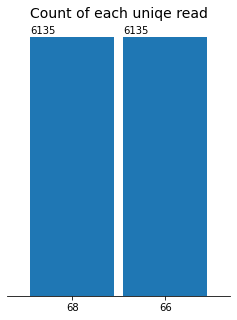

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

ax = pd.value_counts(df_no_stego['reads']).plot(kind = 'bar', 
                                                figsize = (4, 5), rot = 0, width = 0.9)
ax.set_title('Count of each uniqe read', size = 14)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)


for patch in ax.patches:
  width, height = patch.get_width(), patch.get_height()
  x, y = patch.get_x(), patch.get_y()
  ax.annotate(height, (x, y + height + 80), size = 10)
plt.show()

In [104]:
# slpit the data between the 66 and the 68 readings


import numpy as np

df_no_stego_66 = df_no_stego.loc[df_no_stego['reads'] == 66]
df_no_stego_68 = df_no_stego.loc[df_no_stego['reads'] == 68]

# reindexing the splitted data for ease of use

df_no_stego_66.index = np.arange(1, len(df_no_stego_66) + 1)
df_no_stego_68.index = np.arange(1, len(df_no_stego_68) + 1)

df_no_stego_66.head()


,reads,date,time,time_ms
1,66,Jul 24,2020 11:50:31.115404313 CEST,115404313
2,66,Jul 24,2020 11:50:32.106244578 CEST,106244578
3,66,Jul 24,2020 11:50:33.097954528 CEST,097954528
4,66,Jul 24,2020 11:50:34.089994890 CEST,089994890
5,66,Jul 24,2020 11:50:35.079991792 CEST,079991792


In [123]:
arr_anom_66 = []
annomly_str_66 = ""

for i, row in df_no_stego_66["time_ms"].iteritems():

  if len(annomly_str_66) == 0:
    annomly_str_66 = row[3]
   
  elif len(annomly_str_66) == 1:
    annomly_str_66 = annomly_str_66 + row[4]

  elif len(annomly_str_66) == 2:
    annomly_str_66 = annomly_str_66 + row[5]

  if i % 3 == 0:
    arr_anom_66.append(annomly_str_66)
    annomly_str_66 = ""


# Plotting our finding to check any data than tha **444** and **999**

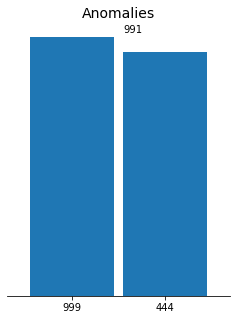

In [121]:
# creating another Pandas dataframe with our finding 

df_anomalies = pd.DataFrame(arr_anom_66, columns=["anomalies"])

# plotting our finding 

ax = pd.value_counts(df_anomalies['anomalies']).plot(kind = 'bar', 
                                                figsize = (4, 5), rot = 0, width = 0.9)
ax.set_title('Anomalies', size = 14)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)


for patch in ax.patches:
  width, height = patch.get_width(), patch.get_height()
  x, y = patch.get_x(), patch.get_y()
  ax.annotate(height, (x, y + height + 80), size = 10)
plt.show()
